In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
plt.rc('figure', figsize=(20, 10))
import numpy as np
import datetime
from pandas import Timedelta

In [ ]:
action04 = pd.read_csv("JData_Action_201604.csv", parse_dates=["time"])
action04_cate8 = action04[action04.cate==8]
action04_cate8.to_csv("data/train/action04_cate8.csv", 
                                                   index=False)
buy04 = action04_cate8[action04_cate8.type==4]
products = pd.read_csv("JData_Product.csv")
users = pd.read_csv("JData_User.csv", encoding='gbk')

In [ ]:

action03 = pd.read_csv("JData_Action_201603.csv", parse_dates=["time"])
action03_cate8 = action03[action03.cate==8]
action03_cate8.to_csv("data/train/action03_cate8.csv", 
                                                   index=False)

buy03 = action03_cate8[action03_cate8.type==4]
buy03.head(2)
train03 = pd.merge(buy03, action03_cate8, on = 'user_id', how='left')

In [220]:
action0304_cate8 = pd.concat((action04_cate8, action03_cate8))
train04 = pd.merge(buy04, action0304_cate8, on = 'user_id', how='left')

In [245]:
len(action0304_cate8)

26182526

In [4]:
users = pd.read_csv("JData_User.csv", encoding='gbk')
users

,user_id,age,sex,user_lv_cd,user_reg_dt
0,54,-1,2,1,2016/1/26
1,79,36-45岁,2,2,2016/1/27
2,100,16-25岁,2,3,2016/1/27
3,266,15岁以下,2,2,2016/1/29
4,333,-1,2,4,2016/1/30
5,605,26-35岁,2,2,2016/2/1
6,638,26-35岁,0,5,2010/8/12
7,686,-1,2,1,2016/2/1
8,692,16-25岁,2,2,2016/2/1
9,819,26-35岁,2,3,2016/2/2


In [7]:
user_index={users.user_id[i]:i for i in range(len(users))}

In [10]:
action_cate8 = pd.read_csv("data/train/action0304_cate8.csv", parse_dates=["time"])

In [33]:
buyer = action_cate8[action_cate8.type==4]

In [83]:
buy_action = pd.merge(buyer, action_cate8[action_cate8.type==5], on=['user_id', 'sku_id'])

In [73]:
buy_action['days_before'] = buy_action.apply(lambda x: (x.time_x - x.time_y).total_seconds()/3600/24, 1)

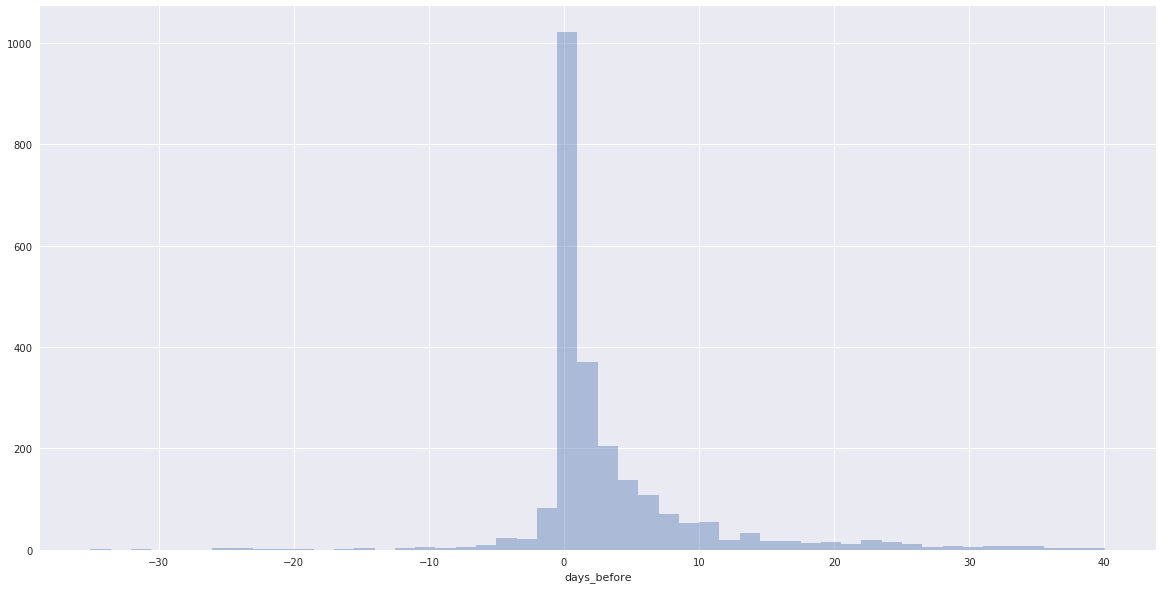

In [74]:
sns.distplot(buy_action.days_before, kde=False)

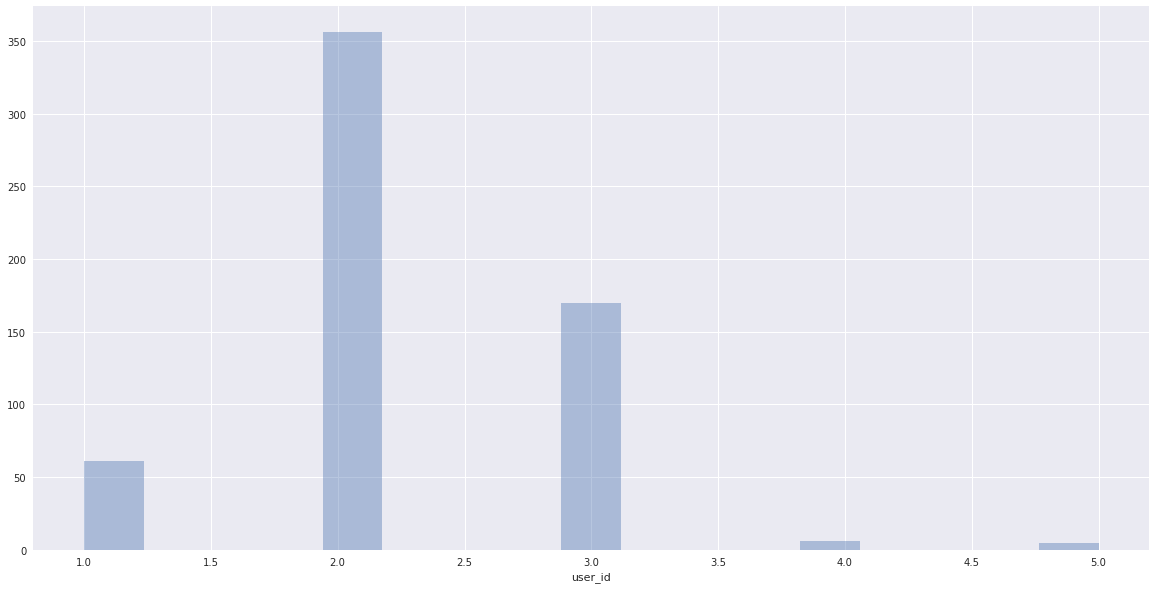

In [85]:
sns.distplot(buy_action[buy_action.time_y.dt.day<buy_action.time_x.dt.day].user_id.value_counts(),
             kde=False)

In [25]:
buyer['user_index'] = buyer['user_id'].map(user_index)

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
buyer[['user_id', 'user_index', 'time']].sort_values('user_index')

,user_id,user_index,time
13600812,4996,93,2016-03-15 16:16:00
16448787,19654,313,2016-03-19 13:49:00
3298657,47392,714,2016-03-07 17:57:00
22368317,51169,764,2016-04-09 13:31:00
2064720,51536,769,2016-03-05 13:34:00
2029016,52141,780,2016-03-05 19:04:00
2134163,52141,780,2016-03-05 19:04:00
10864809,53092,796,2016-03-12 23:09:00
10835023,57982,865,2016-03-12 18:35:00
13425127,70743,1062,2016-03-15 00:04:00


In [236]:
train04['window_end'] = train04.apply(lambda x: \
            datetime.datetime.strptime(x.time_x.strftime("%Y%m%d"), "%Y%m%d"), 1)

In [237]:
train04['window_start'] = train04.apply(lambda x: \
            datetime.datetime.strptime((x.time_x - datetime.timedelta(days=10)).strftime("%Y%m%d"), "%Y%m%d"), 1)

In [239]:
train04[train04.time_y.between(train04.window_start, train04.window_end)]\
    [['user_id', 'sku_id_x', 'sku_id_y', 'time_x', 'time_y', 'model_id_y', 'type_y', 'cate_y', 'brand_y']]\
                        .to_csv("data/train/positive04.csv",
                                index=False, encoding='gbk')

In [ ]:
train03[(train03.time_x.dt.day > train03.time_y.dt.day)\
        &(train03.time_y.dt.day > (train03.time_x.dt.day - 10))][['user_id', 'sku_id_x', 'sku_id_y', 'time_x', 'time_y', 'model_id_y', 'type_y', 'cate_y', 'brand_y']]\
                        .to_csv("data/train/positive03.csv",
                                index=False, encoding='gbk')

In [ ]:
plt.figure()
g = sns.countplot(x="cate", hue="sex", data=action_sample_complete[(action_sample_complete.type==4)])
# g.set_xticklabels(['M', 'F', 'Secret'])

In [ ]:
sns.countplot("age", hue="cate", orient='h', data=action_sample_complete)

In [ ]:
sns.factorplot("sex", kind="count", data=users)

In [ ]:
sns.factorplot(x="cate", hue="type", kind="count", data=action_sample)

In [ ]:
action_sample_complete.set_index('time', inplace=True)

In [ ]:
cate8 = action_sample_complete[action_sample_complete.cate==8].groupby('type').resample('D', how='count')

In [ ]:
products = pd.read_csv("JData_Product.csv")

In [ ]:
products.cate.value_counts()

# Split Data

In [ ]:
action_cate8 = action_sample_complete[action_sample_complete.cate==8]

In [ ]:
action_cate8.to_csv("data/train/action_cate8.csv", index=False, encoding='gbk')

In [ ]:
cart = action_cate8[action_cate8.type==2]
cart

In [ ]:
buy = action_cate8[action_cate8.type==4]
buy.head(2)

In [ ]:
len(buy.user_id.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, cv = train_test_split(buy, test_size = 400, random_state=123)
cv = pd.merge(cv, action_cate8, on = 'user_id', how='left')

In [ ]:
cv[cv.time_x > cv.time_y][['user_id', 'sku_id_x', 'sku_id_y', 'time_x', 'time_y', 'model_id_y', 'type_y', 'cate_y', 'brand_y',
                        'age_y', 'sex_y', 'user_lv_cd_y', 'user_reg_dt_y']]\
                        .to_csv("data/cv/positive.csv",
                                index=False, encoding='gbk')

In [ ]:
train = pd.merge(train, action_cate8, on = 'user_id', how='left')
train[train.time_x > train.time_y][['user_id', 'sku_id_x', 'sku_id_y', 'time_x', 'time_y', 'model_id_y', 'type_y', 'cate_y', 'brand_y',
                        'age_y', 'sex_y', 'user_lv_cd_y', 'user_reg_dt_y']]\
                        .to_csv("data/train/positive.csv",
                                index=False, encoding='gbk')

In [ ]:
cv_users = buy.user_id.unique()[np.random.rand(len(buy.user_id.value_counts())) > 0.85]

In [ ]:
cv_users = np.concatenate((action_cate8.user_id.unique()[:3000], cv_users))

In [ ]:
action_cate8[action_cate8.user_id.isin(cv_users)].to_csv("data/cv/action_cate8.csv", index=False, encoding='gbk')

In [ ]:
action_cate8[~action_cate8.user_id.isin(cv_users)].to_csv("data/train/action_cate8.csv", index=False, encoding='gbk')

In [ ]:
comment = pd.read_csv("JData_Comment.csv")

In [ ]:
train = pd.read_csv("data/train/action_cate8.csv", encoding='gbk', parse_dates=["time"])

In [ ]:
train_buy = train[train.type==4]

In [ ]:
action_positive = pd.merge(train_buy, train, on = ['user_id', 'sku_id'])

In [ ]:
action_positive[['user_id', 'sku_id', 'time_y', 'model_id_y', 'type_y', 'cate_y', 'brand_y',
                        'age_y', 'sex_y', 'user_lv_cd_y', 'user_reg_dt_y']]\
                        .to_csv("data/train/positive.csv",
                                index=False, encoding='gbk')

In [ ]:
action_positive

In [ ]:
action_sample_complete[(action_sample_complete.user_id==33682)&(action_sample_complete.sku_id==69209)]

In [ ]:
len(action_cate8[action_cate8.type==4].sku_id.value_counts())

In [ ]:
len(action_cate8.sku_id.value_counts())

In [ ]:
p_set = set(products.sku_id.value_counts().index)

In [ ]:
inter = set(products.sku_id.value_counts().index) & set((action_cate8[action_cate8.type==4].sku_id.value_counts().index))

In [ ]:
len(inter)

In [ ]:
action02 = pd.read_csv("JData_Action_201602.csv")

In [ ]:
action02_cate8_buy = action02[(action02.cate==8)&(action02.type==4)]

In [ ]:
len(set(action02_cate8_buy.sku_id.value_counts().index) & p_set)

In [ ]:
len(set(action02_cate8_buy.sku_id.value_counts().index) & set((action_cate8[action_cate8.type==4].sku_id.value_counts().index)))

In [ ]:
action03 = pd.read_csv("JData_Action_201603.csv")

In [ ]:
action03_cate8_buy = action03[(action03.cate==8)&(action03.type==4)]

In [2]:
import pandas as pd
negtive = pd.read_csv("data/train/negtive.csv", parse_dates=["time_x", "time_y"], header=0, names=['user_id', 'sku_id_x', 'sku_id_y', 'time_x', 'time_y', 'model_id_y', 'type_y', 'cate_y', 'brand_y'])